## Inicialização
Primeiro, criamos um grafo totalmente desconexo, contendo apenas os vértices que indicam a existência de artistas naquela playlist. Se o artista existe na playlist, mesmo que diversas vezes, consideramos apenas uma aparição no grafo, ou seja, teremos apenas um nó para esse artistam, pois é mais importante, ao longo da análise, captarmos a presença de um mesmo artista em diversas playlists do que muitas aparições desse artista em poucas playlists.   

In [2]:
# Global variables
PLAYLISTS = []
PLAYLISTS_COUNTER = 0

TO_PRINT_DF = None

In [7]:
import os
import random
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import re

from collections import defaultdict
from IPython.display import display, HTML
from collections import Counter
from typing import List

def generate_initial_graph(file_name: str) -> nx.Graph:
    df = pd.read_parquet(file_name)
    occurence_set = set()
    G = nx.Graph()

    for index, row in df.iterrows():
        name = f"{row['artistas'][0]['nome']}_{PLAYLISTS_COUNTER}"
        if name not in occurence_set:
            occurence_set.add(name)
            G.add_node(name)
    
    
    # nx.draw(G, with_labels=True, node_color='skyblue', node_size=2500, edge_color='black', linewidths=1, font_size=15)
    # plt.show()

    PLAYLISTS.append(G)

    return G

def create_graph_connections(G: nx.Graph, playlist_df: pd.DataFrame, playlists_counter) -> nx.Graph:
    all_artists = list(G.nodes)
    simplified_artists_names = [item.split('_')[0] for item in all_artists]
    ocurrence_set = set()

    for index, row in playlist_df.iterrows():
        try:
            current_artist_name = f"{row['artistas'][0]['nome']}"
            if current_artist_name not in ocurrence_set:
                if current_artist_name in simplified_artists_names:
                    previous_occurences_of_artist = [artist for artist in all_artists if artist.startswith(current_artist_name)]
                    for previous_artist in previous_occurences_of_artist:
                        G.add_edge(f'{current_artist_name}_{playlists_counter + 1}', previous_artist)
                else:
                    G.add_node(current_artist_name)
                ocurrence_set.add(f'{current_artist_name}')
        except:
            continue
    return G

def set_graph_results(G: nx.Graph, isolated_nodes: nx.Graph) -> None:
    all_artists = list(G.nodes)

    number_of_edges = current_graph.number_of_edges()

    print(f"Total de artistas encontrados: {len(all_artists)}")

    simplified_artists_names = [item.split('_')[0] for item in all_artists]

    cliques = list(nx.find_cliques(G))
    cliques_greater_than_one = [clique for clique in cliques if len(clique) > 1]

    max_clique = max(cliques, key=len)
    max_clique_size = len(max_clique)

    print(f"Artistas unicos encontrados {len(set(simplified_artists_names))}")
    print(f"Numero de conexoes entre os artistas: {number_of_edges}")
    print(f"Numero de artistas que apareceram em somente uma playlist: {len(isolated_nodes)}")
    print(f"Numero de cliques encontradas: {len(cliques_greater_than_one)}")
    print(f"Maior clique encontrada: {max_clique_size}")

    elements_counter = Counter(simplified_artists_names)
    elements_tuples = list(elements_counter.items())

    sorted_artists = sorted(elements_tuples, key=lambda x: x[1], reverse=True)
    print(sorted_artists)



# Driver Code
graph = generate_initial_graph('what_is.parquet')
PLAYLISTS_COUNTER += 1

playlists_files_path = os.path.join(os.getcwd(), "queries")

current_graph = graph

for playlist_file in os.listdir(playlists_files_path):
    print(f"Analisando o arquivo: {playlist_file}")
    for playlist_name in os.listdir(f"queries\\{playlist_file}"):
        df = pd.read_parquet(f"queries\\{playlist_file}\\{playlist_name}")
        if 'artistas' in list(df.columns):
            current_graph = create_graph_connections(current_graph, df, PLAYLISTS_COUNTER)
            # RETIRAR AQUI
            # if current_graph.number_of_edges() > 40:
            #     break
            PLAYLISTS_COUNTER += 1
    # break
print("\n")

isolated_nodes = [node for node in current_graph.nodes() if current_graph.degree(node) == 0]
# current_graph.remove_nodes_from(isolated_nodes)

set_graph_results(current_graph, isolated_nodes)

suffix_groups = defaultdict(list)
pattern = re.compile(r'_(\d+)$')

for node in current_graph.nodes():
    match = pattern.search(node)
    if match:
        suffix = match.group(1)
        suffix_groups[suffix].append(node)

for nodes_with_same_suffix in suffix_groups.values():
    for i in range(len(nodes_with_same_suffix)):
        for j in range(i + 1, len(nodes_with_same_suffix)):
            current_graph.add_edge(nodes_with_same_suffix[i], nodes_with_same_suffix[j])


# # Compute the positions using the spring layout algorithm for better visualization
# pos = {node: (random.random(), random.random()) for node in current_graph.nodes()}

# # Draw the graph
# plt.figure(figsize=(10, 7))
# nx.draw(current_graph, pos, with_labels=False, node_color='skyblue', node_size=30, edge_color='black', width=1, linewidths=2, font_size=8)


Analisando o arquivo: pop_alternativo_brasil
Analisando o arquivo: pop_independente_brasil
Analisando o arquivo: pop_indie_brasil
Analisando o arquivo: pop_lançamentos_brasil
Analisando o arquivo: pop_limpando_a_cozinha
Analisando o arquivo: pop_paradas_brasil
Analisando o arquivo: pop_top_hits_brasil
Analisando o arquivo: rock_alternativo_brasil
Analisando o arquivo: rock_independente_brasil
Analisando o arquivo: rock_indie_brasil
Analisando o arquivo: rock_lançamentos_brasil
Analisando o arquivo: rock_paradas_brasil
Analisando o arquivo: rock_top_hits_brasil


Total de artistas encontrados: 1002
Artistas unicos encontrados 795
Numero de conexoes entre os artistas: 322
Numero de artistas que apareceram em somente uma playlist: 621
Numero de cliques encontradas: 174
Maior clique encontrada: 4
[('Jota Quest', 4), ('Skank', 4), ('Anitta', 3), ('Jason Mraz', 3), ('Roberta Campos', 3), ('Nando Reis', 3), ('Charlie Brown Jr.', 3), ('Legião Urbana', 3), ('Lulu Santos', 3), ('Pitty', 3), ('Cá

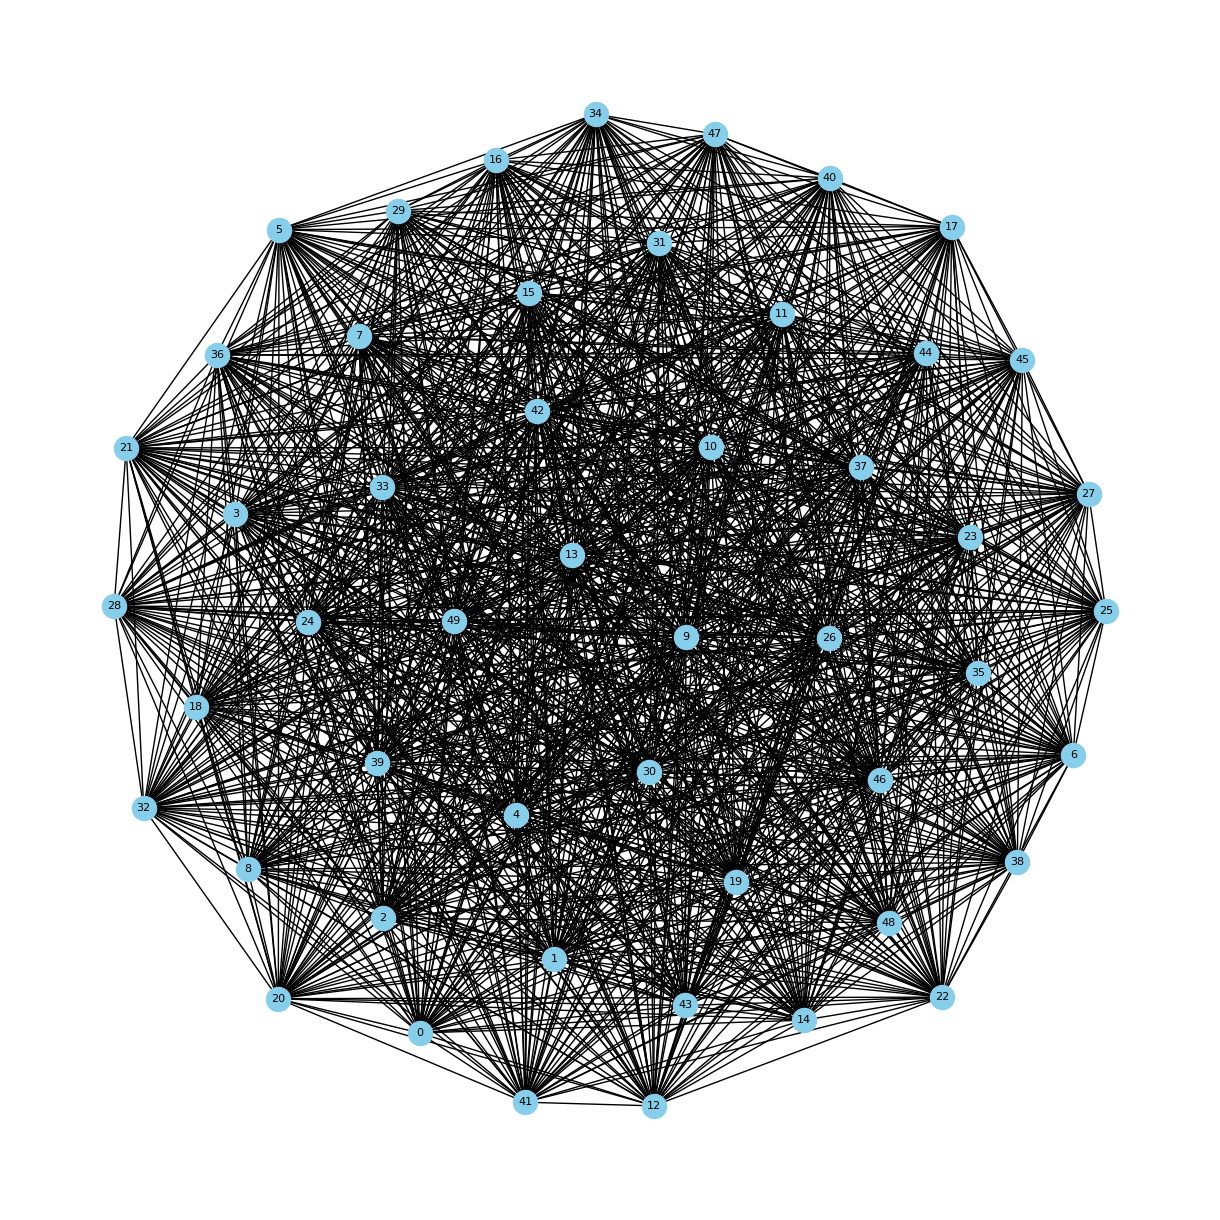

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Generate a complete graph with 50 nodes
G = nx.complete_graph(50)

# Compute the positions using the spring layout algorithm for better visualization
pos = nx.spring_layout(G, seed=42)  # seed for reproducibility

# Draw the graph
plt.figure(figsize=(12, 12))
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=300, edge_color='black', width=1, linewidths=1, font_size=8)

# Show the plot
plt.show()